## Práctica #3

**Profesor**: Luis Norberto Zúñiga Morales, Universidad Iberoamericana Ciudad de México

*Inspirado en el libro [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).*

**Objetivos**:
- Introducir la API de Keras a los estudiantes para la implementación de redes neuronales convolucionales mediante Tensorflow.
- Implementar ideas básicas de una red neuronal convolucional mediante un ejemplo práctico de clasificación usando el dataset MNIST.

**Instrucciones**: 
- Realizar cada una de las actividades propuestas en este libro de Google Colab.
- Se puede realizar en equipos de 2 personas.
- Para la entrega de sus respuestas, es importante que todas las celdas en cuestión se encuentren ejecutadas para mostrar y evaluar sus resultados.
- Descargar su libro con terminación IPYNB y cargarlo en la actividad correspondiente en Brigthspace.

In [ ]:
print('Mau')
print('Andres')

Mau
Andres


### Convolución en Acción

En Tensorflow, una imagen se representa como un tensor en 3D con una forma [alto, ancho, # canales].
- Un mini-batch se representa como un tensor 4D de forma [tamaño del mini-batch, alto, ancho, # canales].
- Los pesos de una capa convolucional se representan como un tensor 4D con forma [$f_h$, $f_w$, $f_n$, $f_n$].
- Los terminos del bias de una capa convolucional se representan como un tensor 1D de forma [$f_n$].

El siguiente ejemplo carga unas imágenes precargadas 

In [ ]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])

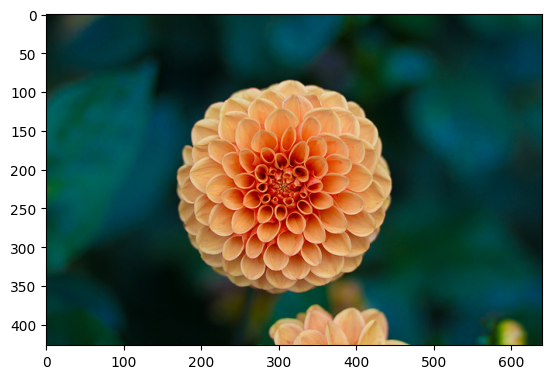

In [ ]:
# escribir aqui su codigo para que muestre las imagenes y puedan verlas antes de aplicar los filtros
plt.imshow(flower)
plt.show()

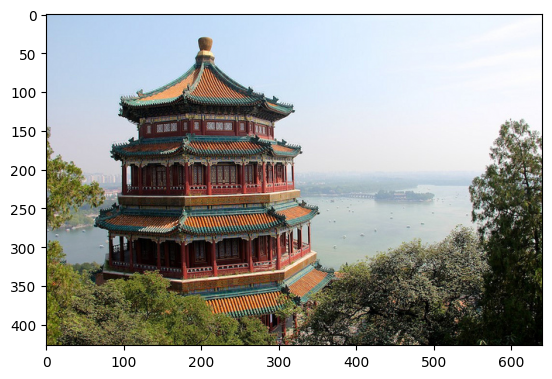

In [ ]:
plt.imshow(china)
plt.show()

In [ ]:
batch_size, height, width, channels = images.shape

In [ ]:
# escribir su codigo para imprimir las variables anteriores para visualizar el valor de cada una de ellas
print(batch_size)

2


In [ ]:
print(height)

427


In [ ]:
print(width)

640


In [ ]:
print(channels)

3


In [ ]:
# creamos dos filtros
filters = np.zeros(shape=(7,7, channels, 2), dtype = np.float32) #flitros de 7 x 7 x # de canales x # de filtros
filters[:, 3, :, 0] = 1 # linea vertical 
filters[3, :, :, 1] = 1 # linea horizontal

- *images* es el mini-batch (un tensor 4D)
- *filters* sons los filtros que van a aplicar
- Se aplican ambos filtros usando `tf.nn.conv2d()`, con cero padding y paso de 1.

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME')

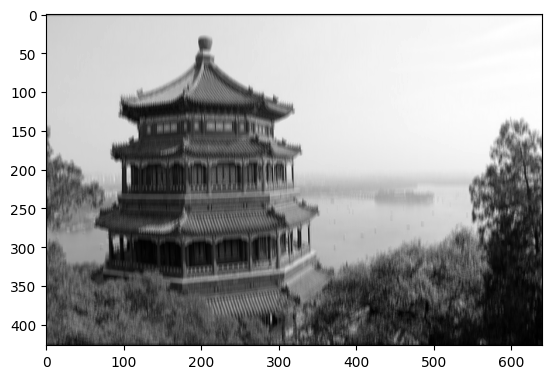

In [ ]:
plt.imshow(outputs[0, :, :, 0], cmap = 'gray') # graficar primera imagen aplicada segundo mapa de caracteristicas
plt.show()

### MNIST con Capas Convolucionales



In [ ]:
import random
import pandas as pd

En primer lugar, vamos a revisar las versiones de nuestras librerías principales.

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

Keras provee algunas funciones de utilidad para descargar y cargar conjuntos de datos comunes. En este caso, vamos a utilizar el dataset llamado MNIST. Vamos a cargarlo:

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Visualización de los datos

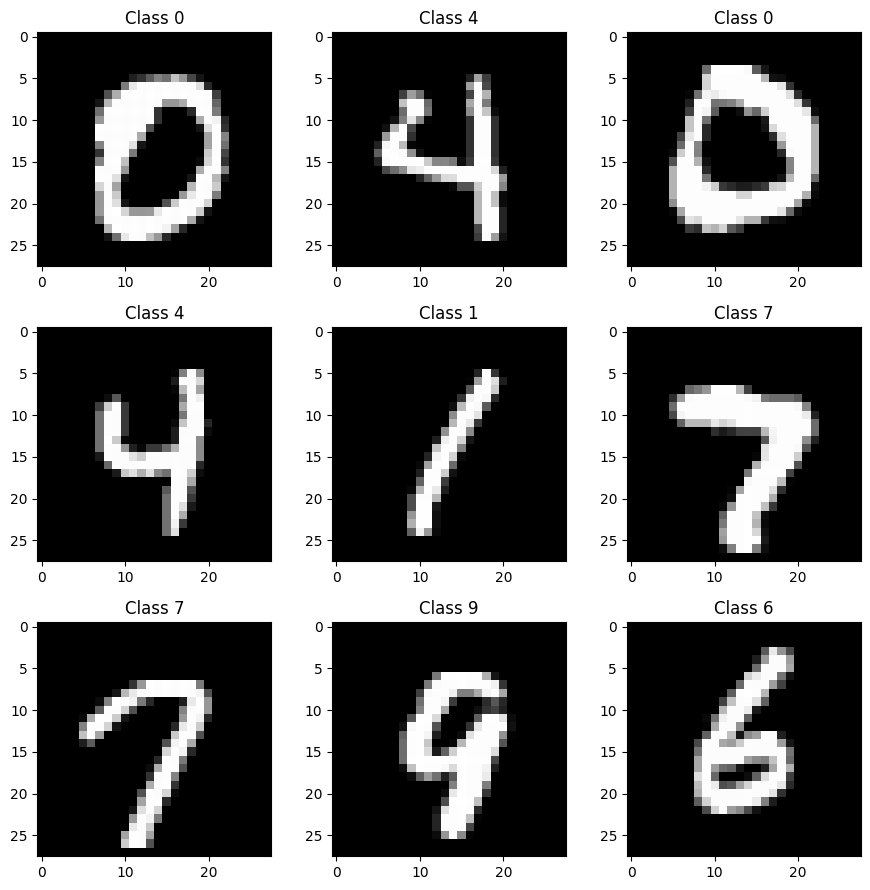

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

A diferencia de Scikit Learn, Keras representa las imágenes como un arreglo. En este caso, son imágenes de tamaño 28x28. Además, la intensidad de cada pixel se representa como enteros entre 0 y 255.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

### Preparando los datos para su entrenamiento

Se carga el dataset en las variables de entrenamiento y prueba. Además, vamos a considerar un conjunto de validación para evaluar finalmente la red neuronal. 

Por otro lado, debemos normalizar los valores de la matriz (que van de 0 a 255) para que solo sean valores entres 0 y 1. Por esto, dividimos entre 255. Con esto, adicionalmente, los valores pasan a ser de punto flotante.

In [ ]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

### Construcción y entrenamiento de la red neuronal convolucional

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28,28,1]), # 64 filtros de tamaño 7x7
    keras.layers.MaxPooling2D(2), #maxpool de tamaño 2x2 con salto de 2, divide cada dimensión espacial en dos
    keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'), # misma estructura que se repite dos veces
    keras.layers.Conv2D(128, 3, activation='relu', padding = 'same'), # el número de capas es un hiperparámetros por ajustar
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'), # el número de filtros aumenta para capturar características más complejas
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'), # perceptron multicapa para clasificar
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

Usualmente, los valores de los pesos iniciales se eligen de forma aleatoria y el valor del bias se inicializa en 0. Sin embargo, esto trae consigo ciertos problemas...

Después de crear el modelo, debemos compilarlo con el método `compile()`, el cual permite especificar la función de pérdida y el optimizador, además de otras métricas a calcular durante el entrenamiento y evaluación.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 17s 7ms/step - loss: 0.8847 - accuracy: 0.7102 - val_loss: 0.1360 - val_accuracy: 0.9562
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1723 - accuracy: 0.9502 - val_loss: 0.0855 - val_accuracy: 0.9732
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1176 - accuracy: 0.9654 - val_loss: 0.0610 - val_accuracy: 0.9824
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0901 - accuracy: 0.9733 - val_loss: 0.0506 - val_accuracy: 0.9852
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.0469 - val_accuracy: 0.9866
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0633 - accuracy: 0.9810 - val_loss: 0.0392 - val_accuracy: 0.9874
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0404 - val_ac

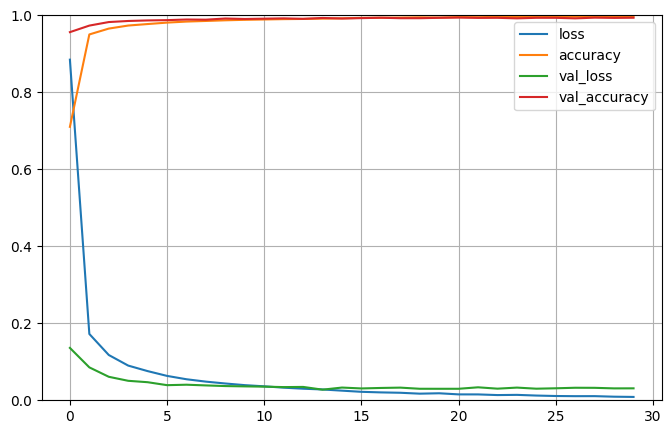

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

### Evaluación del modelo obtenido y predicciones para datos que no ha visto antes

Para realizar la evaluación final del modelo se utilizar el método `evaluate()` pasando como argumentos `X_test` y `y_test`.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 5.8262 - accuracy: 0.9937


[5.826188564300537, 0.9937000274658203]

Igual que Scikit Learn, es posible predecir las etiquetas del conjunto de prueba. Noten que regresa un arreglo con todas las predicciones.

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


¿Cómo se ve la predicción? Es un arreglo de (en este caso) 10 clases, donde a cada entrada se le asigna un valor de 'probabilidad'. Para determinar el valor final de la clase, se considera el más alto entre todos ellos.

In [ ]:
predictions[56]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(predictions[56])

4

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

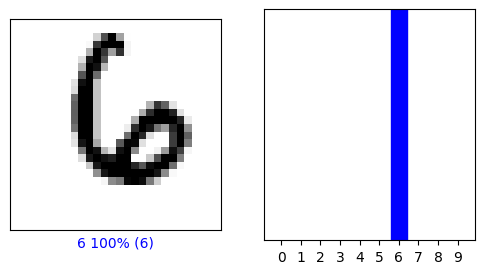

In [ ]:
i = 88
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

## Actividad 1

Revisar la documentación en Keras/Tensorflow sobre las capas convolucionales 2D y el pooling. Realizar un pequeño resumen sobre los argumentos que se utilizaron al momento de construir la arquitectura de la red neuronal convolucional anterior.

**Resumen de los argumentos para la construcción de la red neuronal:**

Argumentos de Conv2D:
Existen más argumentos, solamente se mencionan los utilizados o especificados en la práctica.
1.   Filters: el numero de filtros en la convolucion
2.   kernel_size: especifica el tamaño de la ventana de convolucion; largo y ancho
3. strides: tamaño del paso de la convolución, tanto largo como ancho, puede ser el mismo valor o distintos
4. padding: uno de "valid" o "same". Valid significa sin padding. Same hace un padding con ceros.
5. Activation: que función de activación se utiliza

Para el layer de Pooling MaxPooling2D:

1.   pool_size: el tamaño de la ventana para cual tomar el valor máximo. Se refiere a ancho y largo
2.   strides: especifica cuanto se mueve la ventana en tamaño de paso en el pooling, largo y ancho del paso.
3. padding: valid o same. Valid es sin padding. Same es padding en todos lados de tal forma que la entrada y la salida tienen la misma dimension










## Actividad 2

1. Construir un perceptrón multicapa (*feedforward neural network*) para clasificar las imágenes de MNIST con la siguiente arquitectura:
- una capa de entrada Flatten de tamaño [28,28]
- dos capas ocultas, la primera con 300 neuronas y al segunda con 100 neuronas, ambas con función de activación ReLU
- una capa de salida con 10 neuronas y función de activación softmax
- ya que es un problema de clasificación, como función de pérdida se utiliza *categorical cross entropy* y como algoritmo de optimización usen gradiente descendiente estocástico.
- utilizar early stoping para evitar sobreajuste.

Comparar el desempeño de esta red neuronal con la de este programa mediante las métricas de evaluación y el historial de entrenamiento. ¿Por qué creen que una es mejor que la otra?

2. Agreguen dropout a la red con un valor de 0.2. ¿Mejora en algo el desempeño del perceptrón anterior?

Actividad 2 inciso 1

In [ ]:
#implementamos el modelo dado por la práctica
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(300, kernel_initializer = 'he_normal', activation = 'relu')) # la capa con 300 neuronas y ReLU
model.add(keras.layers.Dense(100, activation='relu')) # segunda capa con 100 neuronas y relu
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#se añade el callback del early stopping, con paciencia de dos epochs
#Monitoreamos val_loss y la condicion de paro es el numero de epochs
#los demás parámetros son los default
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
#compilar el modelo (funcion de perdida y para optimizar y con que evaluar)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks=[callback])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5962 - accuracy: 0.8431 - val_loss: 0.3120 - val_accuracy: 0.9122
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2936 - accuracy: 0.9160 - val_loss: 0.2415 - val_accuracy: 0.9326
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2398 - accuracy: 0.9309 - val_loss: 0.2058 - val_accuracy: 0.9428
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2051 - accuracy: 0.9415 - val_loss: 0.1792 - val_accuracy: 0.9502
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1786 - accuracy: 0.9489 - val_loss: 0.1606 - val_accuracy: 0.9532
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1585 - accuracy: 0.9553 - val_loss: 0.1476 - val_accuracy: 0.9572
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1423 - accuracy: 0.9596 - val_loss: 0.1361 - val_ac

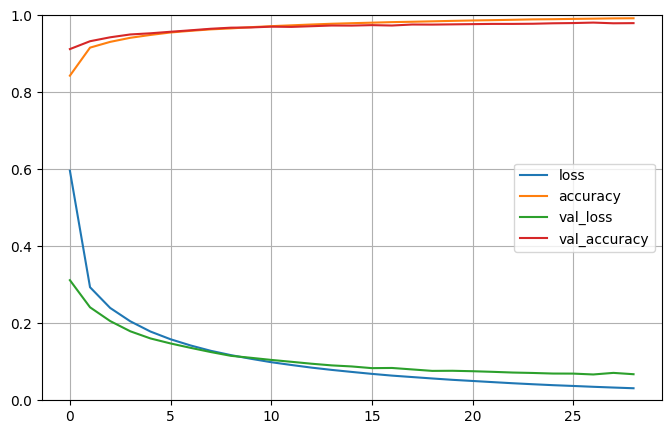

In [ ]:
#Se muestra el gráfico, se ve que se detiene en el epoch 34
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.0,1) # modifica el rango del eje y
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.5545 - accuracy: 0.9734


[13.55452823638916, 0.9733999967575073]

1. La red neuronal convolucional tiene un accuracy de 0.9937 mientras que una red neuronal "normal" o más "tradicional" tiene un accuracy de 0.9734
2. Considero que la red neuronal convolucional es mejor que la red tradicional porque se adapta mejor al tipo de objeto (imágenes) que estamos manejando. Con el tipo de capa 2D esta es más adecuada. 

Actividad 2 inciso 2

In [ ]:
#implementamos el modelo dado por la práctica
model = keras.models.Sequential() #crea un modelo secuencial, el más simple en Keras
model.add(keras.layers.Flatten(input_shape = (28,28))) # la capa de entrada, Flatten covierte las imagenes en objetos de una dimension
model.add(keras.layers.Dense(300, kernel_initializer = 'he_normal', activation = 'relu')) # la capa con 300 neuronas y ReLU
model.add(keras.layers.Dropout(0.2)) #se añade dropout
model.add(keras.layers.Dense(100, activation='relu')) # segunda capa con 100 neuronas y relu
model.add(keras.layers.Dropout(0.2)) #se añade dropout
model.add(keras.layers.Dense(10, activation='softmax')) # la capa de salida, una neurona por clase

In [ ]:
#se añade el callback del early stopping, con paciencia de dos epochs
#Monitoreamos val_loss y la condicion de paro es el numero de epochs
#los demás parámetros son los default
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
#compilar el modelo (funcion de perdida y para optimizar y con que evaluar)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks=[callback])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7699 - accuracy: 0.7706 - val_loss: 0.3267 - val_accuracy: 0.9112
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8889 - val_loss: 0.2474 - val_accuracy: 0.9330
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3003 - accuracy: 0.9123 - val_loss: 0.2073 - val_accuracy: 0.9432
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9240 - val_loss: 0.1814 - val_accuracy: 0.9492
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2278 - accuracy: 0.9339 - val_loss: 0.1620 - val_accuracy: 0.9536
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2014 - accuracy: 0.9401 - val_loss: 0.1453 - val_accuracy: 0.9596
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1856 - accuracy: 0.9460 - val_loss: 0.1352 - val_ac

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 10.2204 - accuracy: 0.9785


[10.22044563293457, 0.9785000085830688]

Añadiendo el DropOut el accuracy aumenta de 0.9734 a 0.9785.
El dropout añade accuracy al modelo, en este caso fue de +0.0051